# Notebook 10 - Seaborn and Pandas

Graphics library built on top of Matplotlib.
   * Provides additional plotting and statistical tools
   * Extra emphasis on aesthetics
   * Interfaces well with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline
import seaborn as sns
from scipy import stats, integrate

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

In [4]:
df_temp.head()

,outdoor,indoor
time,,
2014-01-01 00:00:00+01:00,4.38,21.94
2014-01-01 00:10:00+01:00,4.25,22.00
2014-01-01 00:20:00+01:00,4.19,22.00
2014-01-01 00:30:00+01:00,4.06,22.00
2014-01-01 00:40:00+01:00,4.06,22.00


<Axes: xlabel='time'>

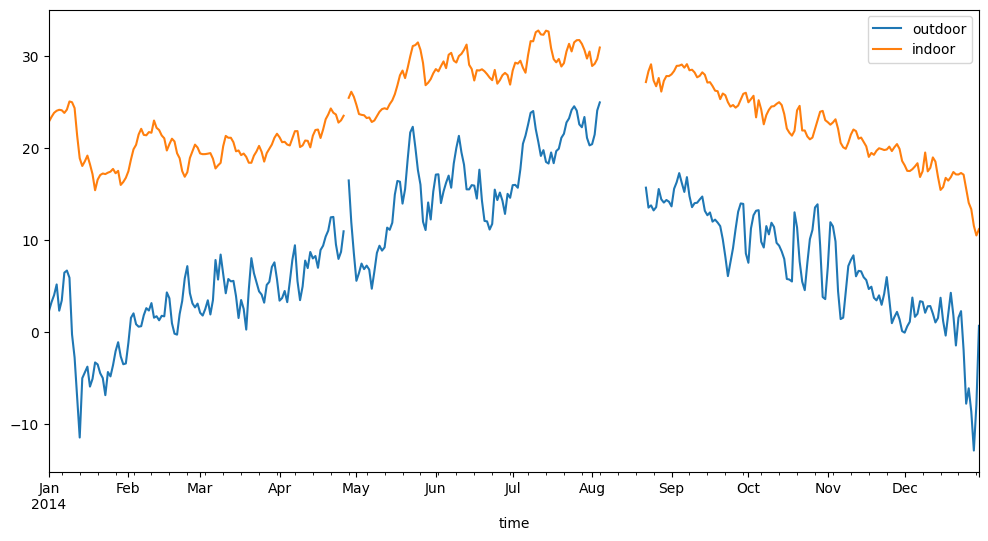

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

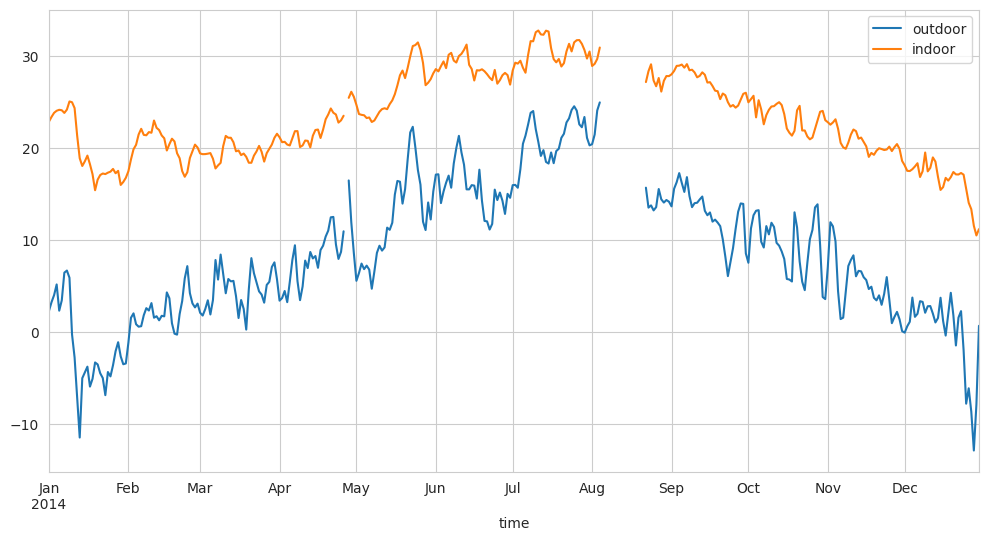

In [6]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

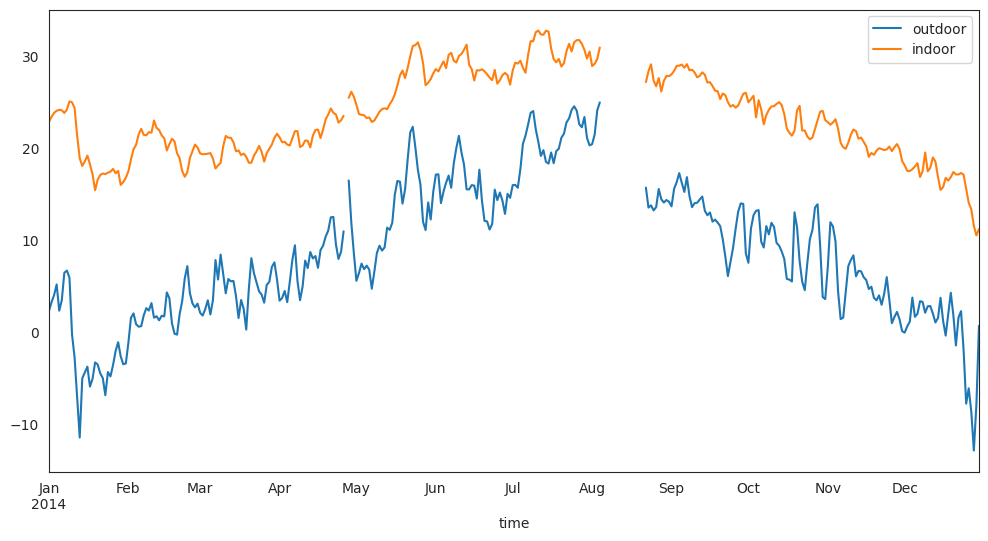

In [7]:
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

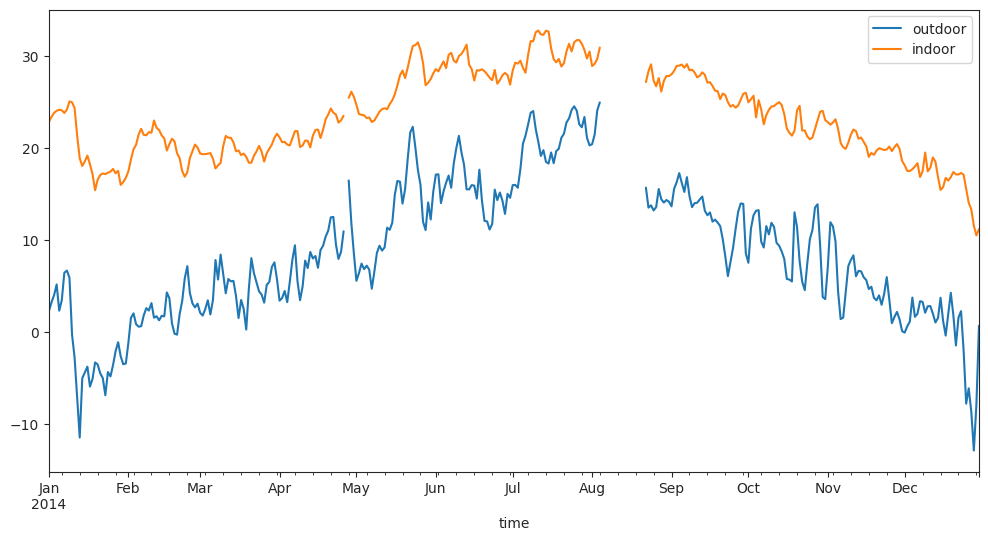

In [8]:
sns.set_style("ticks")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

In [9]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

<Axes: xlabel='time'>

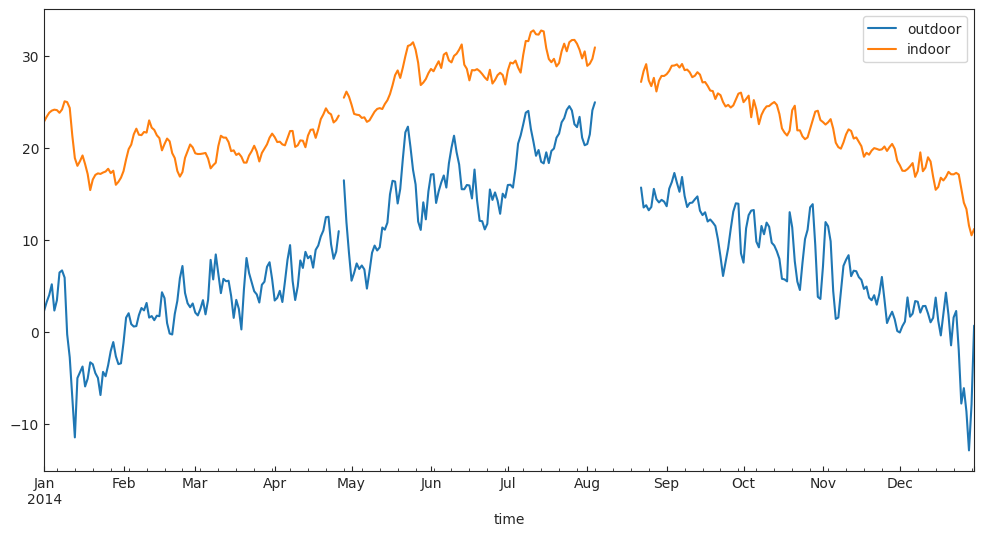

In [10]:
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

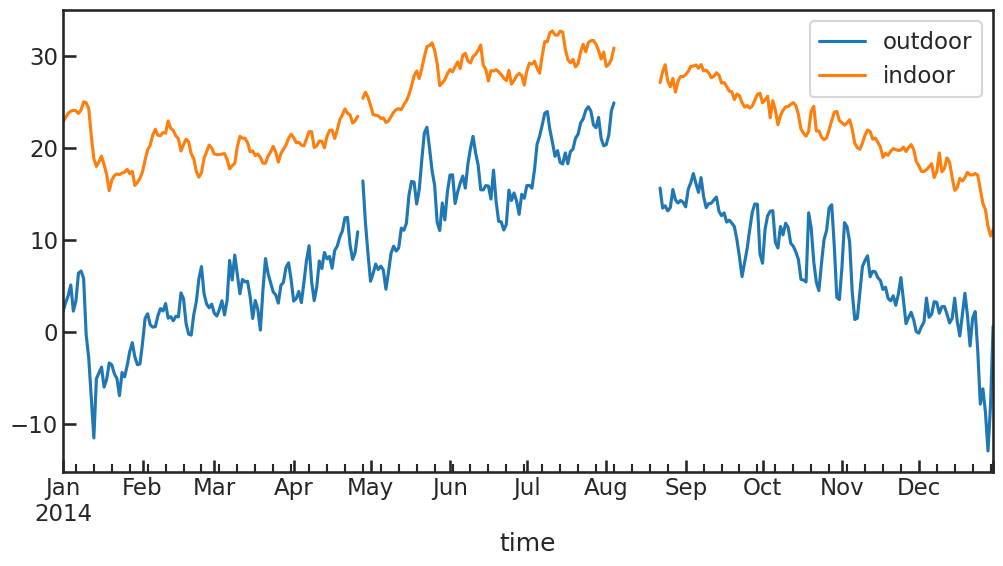

In [11]:
sns.set_context("talk")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

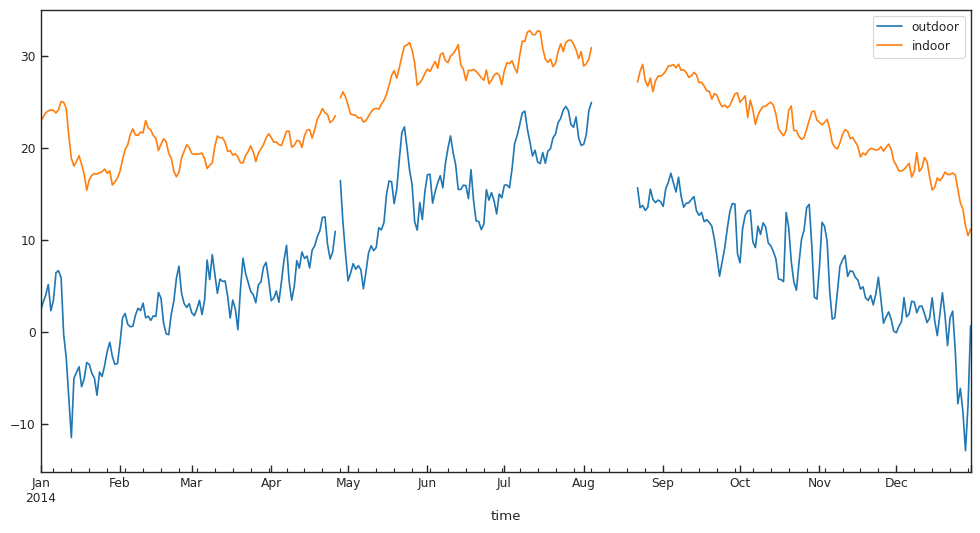

In [12]:
sns.set_context("paper")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

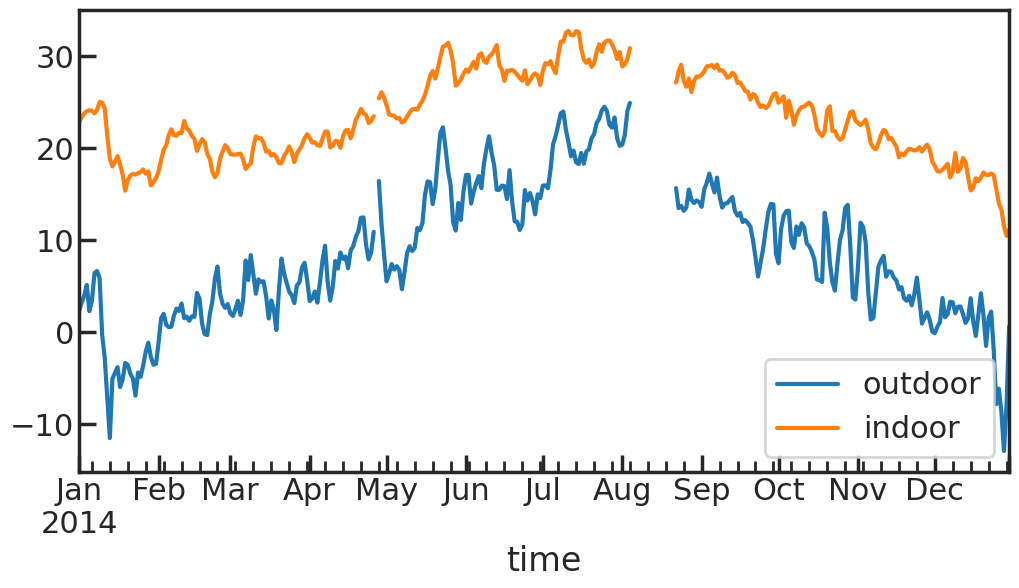

In [13]:
sns.set_context("poster")
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

<Axes: xlabel='time'>

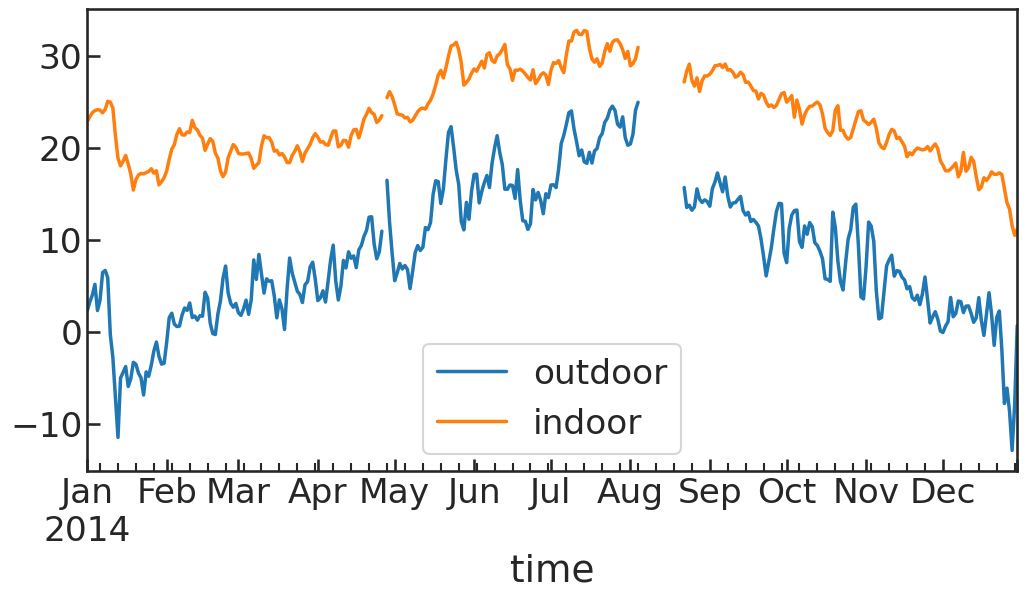

In [14]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

### seaborn.displot and seaborn.histplot

visualize the distribution of your data with a histogram (with some extra features)

<Axes: ylabel='Count'>

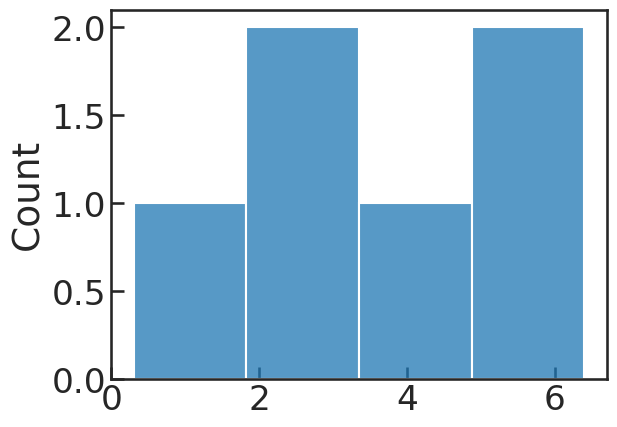

In [15]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"}  )
data = [0.3,2.1,2.5, 3.5,6.4,6.2]
sns.histplot(data)

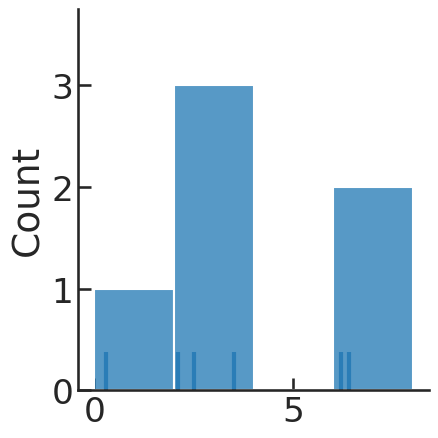

In [16]:
data = [0.3,2.1,2.5, 3.5,6.4,6.2]
mybins = [0,2,4,6,8]
sns.displot(data,kind='hist', bins=mybins ,rug=True, rug_kws={"color": "r", "alpha": 0.8, "linewidth": 3, "height":0.1})

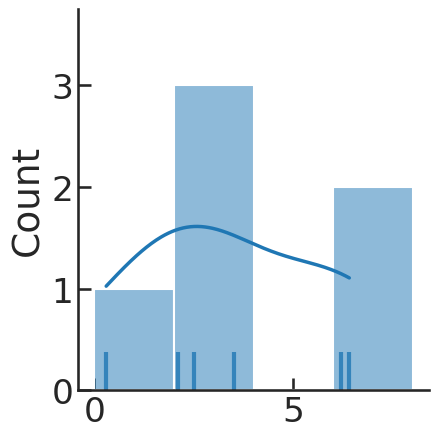

In [17]:
data = [0.3,2.1,2.5,3.5,6.4,6.2]
mybins = [0,2,4,6,8]
sns.displot(data,kind='hist', bins=mybins, kde=True ,rug=True, rug_kws={"color": "r", "alpha": 0.8, "linewidth": 3, "height":0.1})

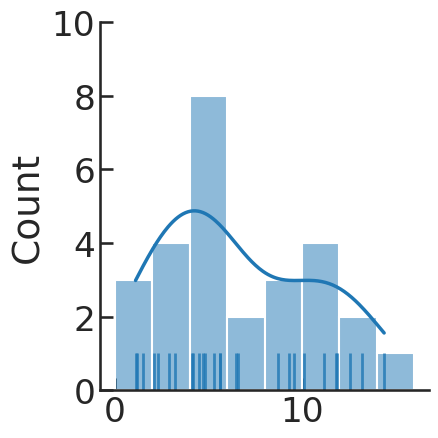

In [18]:
data2 = [1.1,6.5,4.2,2.1,1.5,3.2,2.3,4.1,4.5,5.3,9.6,10.1,11.2,11.9,11.8,9.3,5.6,4.7,4.8,2.9,1.2,6.6,8.7,12.6,14.4,13.2,5.6]
mybins = [0,2,4,6,8,10,12,14,16]
sns.displot(data2,kind='hist', bins=mybins, kde=True ,rug=True, rug_kws={"color": "r", "alpha": 0.8, "linewidth": 2, "height":0.1})

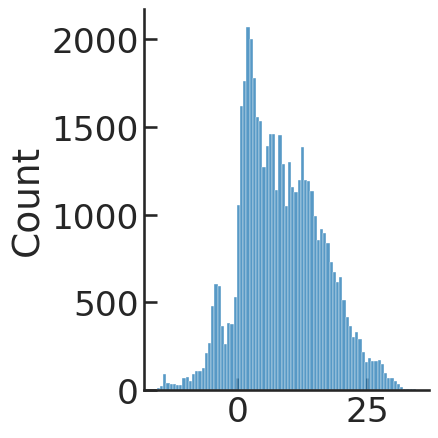

In [19]:
sns.displot(df_temp["outdoor"].dropna().values)

<Axes: ylabel='Count'>

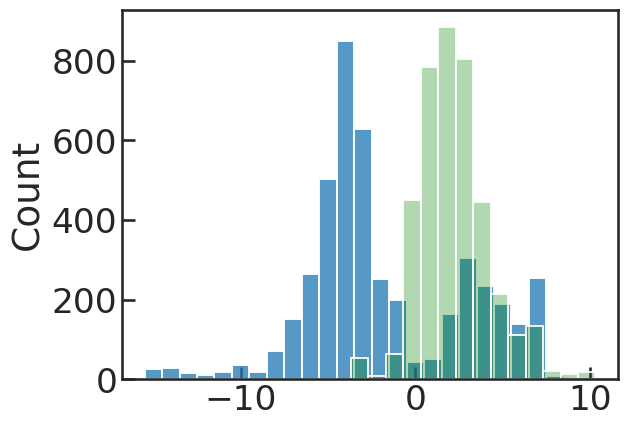

In [20]:
df_temp_jan=df_temp["2014-1-1":"2014-1-31"]
df_temp_feb=df_temp["2014-2-1":"2014-2-28"]
fig, ax = plt.subplots()
sns.histplot(df_temp_jan["outdoor"].dropna().values, binwidth=1, ax=ax)
sns.histplot(df_temp_feb["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'green', alpha=0.3)

<Axes: ylabel='Count'>

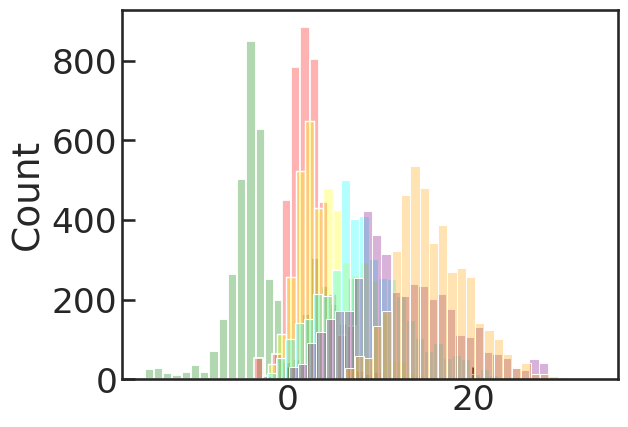

In [21]:
df_temp_jan=df_temp["2014-1-1":"2014-1-31"]
df_temp_feb=df_temp["2014-2-1":"2014-2-28"]
df_temp_mar=df_temp["2014-3-1":"2014-3-30"]
df_temp_apr=df_temp["2014-4-1":"2014-4-30"]
df_temp_may=df_temp["2014-5-1":"2014-5-30"]
df_temp_jun=df_temp["2014-6-1":"2014-6-30"]
fig, ax = plt.subplots()
sns.histplot(df_temp_jan["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'green', alpha=0.3)
sns.histplot(df_temp_feb["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'red', alpha=0.3)
sns.histplot(df_temp_mar["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'yellow', alpha=0.3)
sns.histplot(df_temp_apr["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'cyan', alpha=0.3)
sns.histplot(df_temp_may["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'purple', alpha=0.3)
sns.histplot(df_temp_jun["outdoor"].dropna().values, binwidth=1, ax=ax, color = 'orange', alpha=0.3)

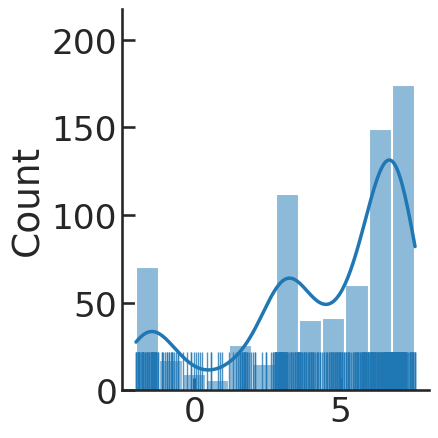

In [22]:
df_temp_jan1tojan5=df_temp["2014-1-06":"2014-1-10"]
sns.displot(df_temp_jan1tojan5["outdoor"].dropna().values,kind='hist',  kde=True ,rug=True, rug_kws={"color": "r", "alpha": 0.8, "linewidth": 1, "height":0.1})

What is the curve? Is it a fit?

No, by default it is a Kernel Density Estimation

Functional fit - "Parametric method" to estimate the distribution function

Kernel Density Estimation (KDE) - "Non-parametric" tool to estimate the underlying distribution function.

KDE returns a "smoothed" distribution.

Most common method: For each discrete datapoint, draw a Gaussian "kernel" (a gaussian function with area equal to one). Add together all of the kernels to get the estimated "smooth" function.

The KDE has two principal options:
* the type of function (most commonly a Gaussian)
* the smoothing parameter (the "bandwidth") - for a Gassian this is the width of the Gaussian


In [23]:
x = np.random.chisquare(8, 40)

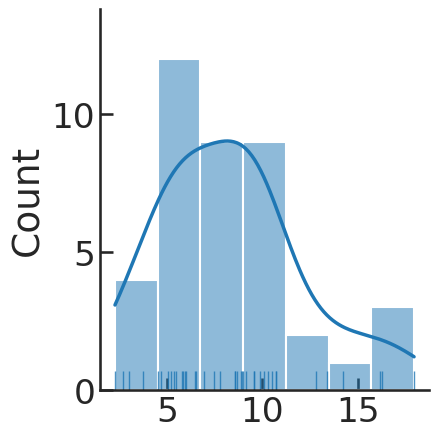

In [24]:
sns.displot(x,kde=True,rug=True,rug_kws={"color": "r", "alpha": 0.8, "linewidth": 1, "height":0.05})

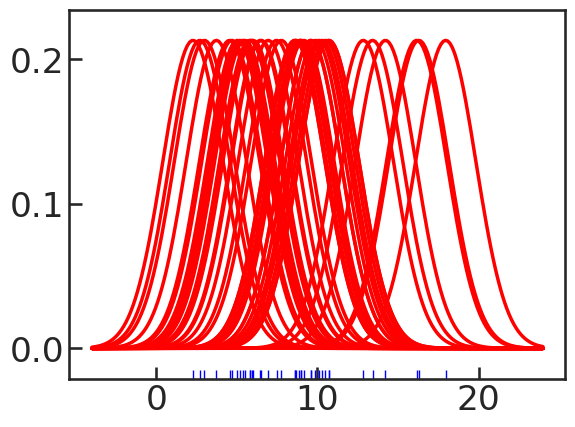

In [25]:
# Example from https://seaborn.pydata.org/tutorial/distributions.html
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 24, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color="b", linewidth=1);

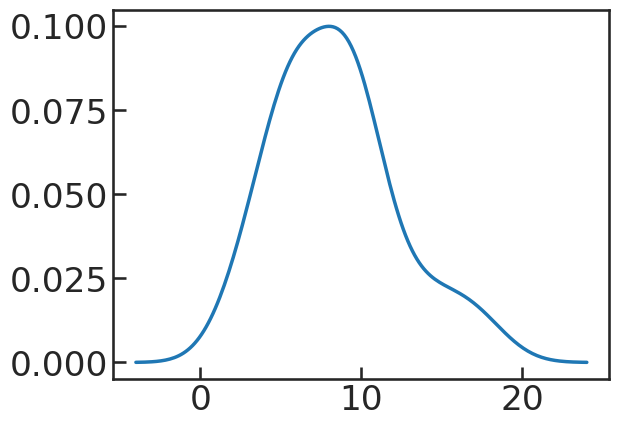

In [26]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

<Axes: ylabel='Density'>

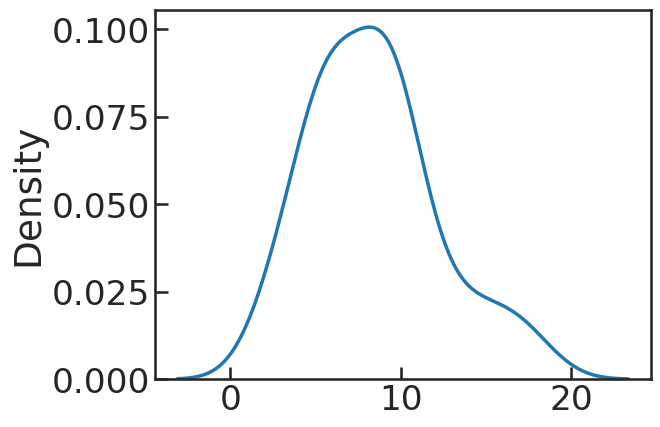

In [27]:
# You can do just the KDE (and not the histogram) using kdeplot

sns.kdeplot(x)

<ipython-input-28-f9b84228b522>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=.2, label="bw: 0.2")
<ipython-input-28-f9b84228b522>:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=5, label="bw: 5")


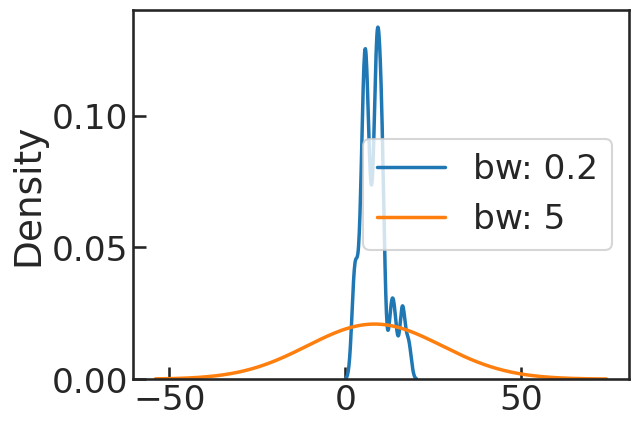

In [28]:
# bandwidth choice is important, but automatic is generally a good algorithim
#sns.displot(x, label="auto")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=5, label="bw: 5")
plt.legend();

<ipython-input-29-7941a826b810>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df_temp["outdoor"].dropna().values, bw=.2, label="bw: 0.2")
<ipython-input-29-7941a826b810>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df_temp["outdoor"].dropna().values, bw=5, label="bw: 5")


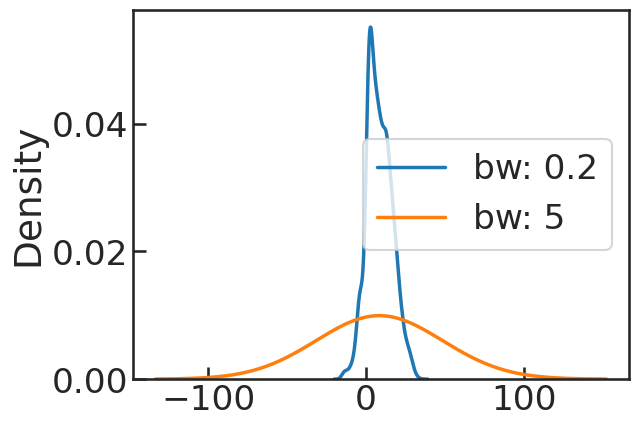

In [29]:
#sns.distplot(df_temp["outdoor"].dropna().values)
sns.kdeplot(df_temp["outdoor"].dropna().values, bw=.2, label="bw: 0.2")
sns.kdeplot(df_temp["outdoor"].dropna().values, bw=5, label="bw: 5")
plt.legend();

Seaborn distplot does allow you to do a parametric fit instead of a KDE (or do both)

#### Scatterplots and fits

seaborn functions regplot() or lmplot()

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Both of these allow you to plot your data and a linear regression (a linear fit), or just your data as a scatter plot.


<Axes: >

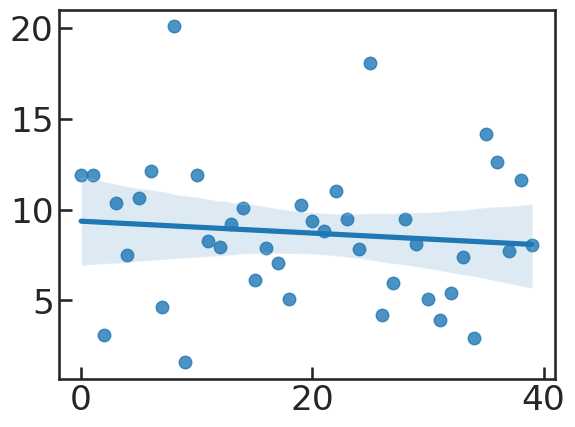

In [30]:
x = np.arange(0,40)
y = np.random.chisquare(9, 40)

sns.regplot(x=x, # Horizontal axis
           y=y) # Vertical axis


<Axes: >

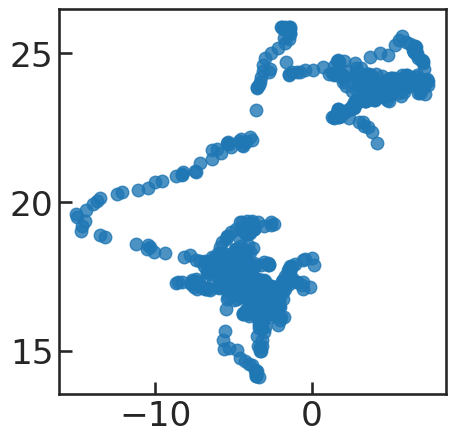

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.regplot(x=df_temp_jan.resample("H")["outdoor"].mean().values, # Horizontal axis
           y=df_temp_jan.resample("H")["indoor"].mean().values, # Vertical axis
            fit_reg= False
           )

<Axes: >

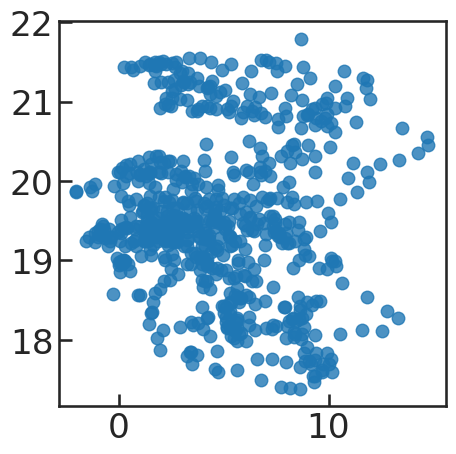

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.regplot(x=df_temp_mar.resample("H")["outdoor"].mean().values, # Horizontal axis
           y=df_temp_mar.resample("H")["indoor"].mean().values, # Vertical axis
            fit_reg= False
           )

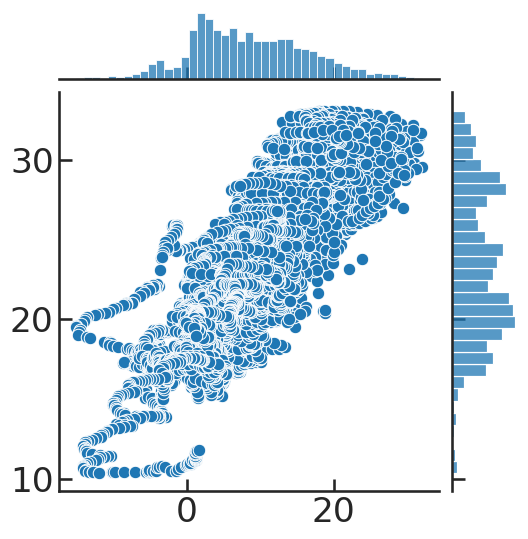

In [33]:
sns.jointplot(x=df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           y=df_temp.resample("H")["indoor"].mean().values # Vertical axis
           )

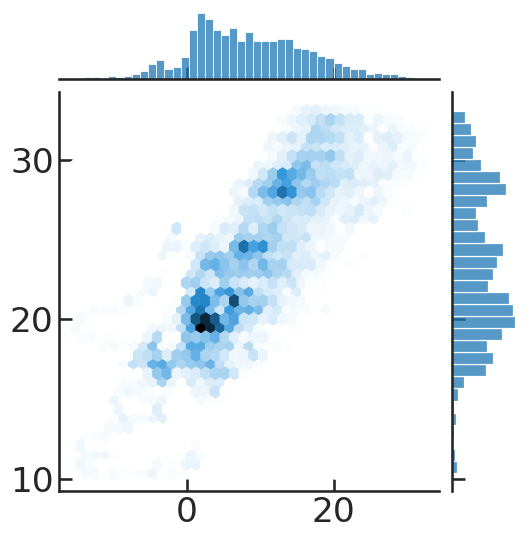

In [34]:
sns.jointplot(x=df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           y=df_temp.resample("H")["indoor"].mean().values # Vertical axis
              , kind="hex"
           )


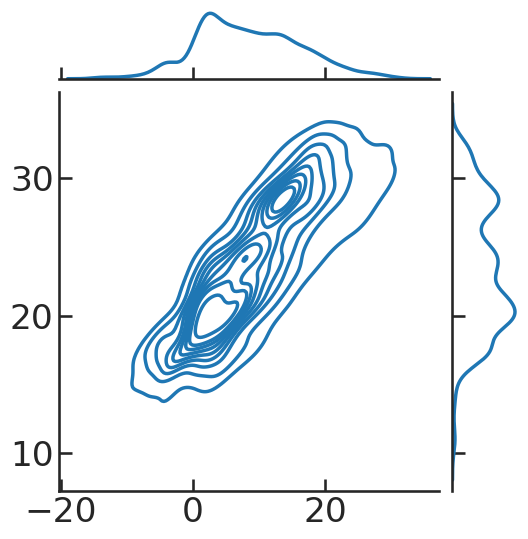

In [35]:
sns.jointplot(x=df_temp.resample("H")["outdoor"].mean().values, # Horizontal axis
           y=df_temp.resample("H")["indoor"].mean().values # Vertical axis
              , kind="kde"
           )

<ipython-input-36-8700df0bf9e5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_temp.resample("H")["outdoor"].mean().dropna().values,


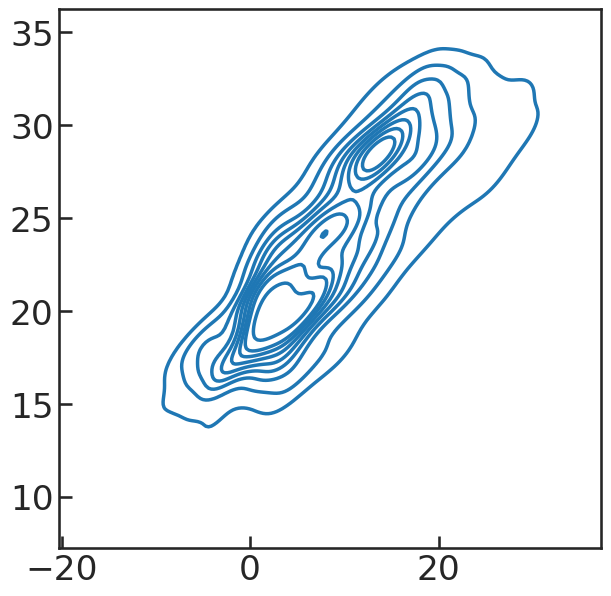

In [36]:
f, ax = plt.subplots(figsize=(7, 7))

sns.kdeplot(x=df_temp.resample("H")["outdoor"].mean().dropna().values,
            y=df_temp.resample("H")["indoor"].mean().dropna().values, shade=False);

<ipython-input-38-53d06c37a769>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_temp_jan.resample("H")["outdoor"].mean().dropna().values,
<ipython-input-38-53d06c37a769>:6: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.rugplot(df_temp_jan.resample("H")["indoor"].mean().dropna().values, vertical=True, ax=ax);


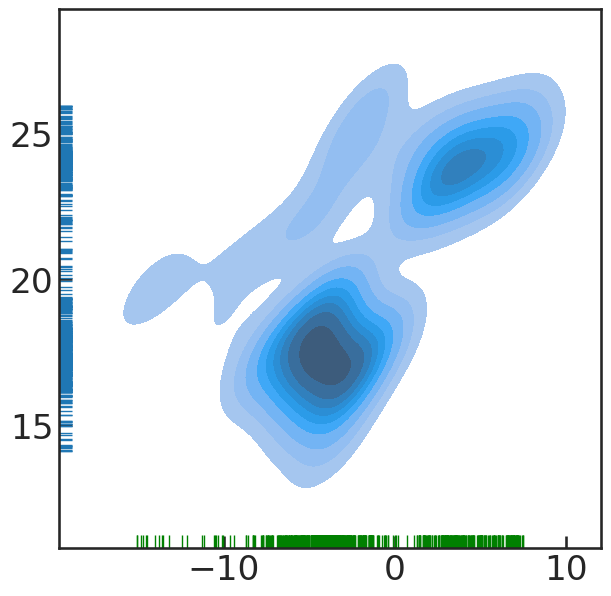

In [38]:
f, ax = plt.subplots(figsize=(7, 7))

sns.kdeplot(x=df_temp_jan.resample("H")["outdoor"].mean().dropna().values,
            y=df_temp_jan.resample("H")["indoor"].mean().dropna().values, shade=True);
sns.rugplot(df_temp_jan.resample("H")["outdoor"].mean().dropna().values, color="g", ax=ax)
sns.rugplot(df_temp_jan.resample("H")["indoor"].mean().dropna().values, vertical=True, ax=ax);

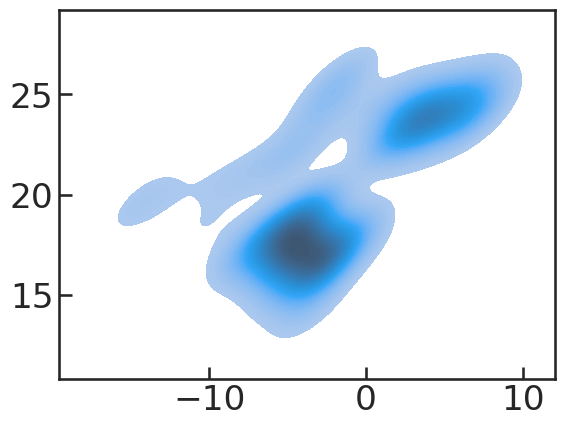

In [40]:
sns.kdeplot(x=df_temp_jan.resample("H")["outdoor"].mean().dropna().values,
            y=df_temp_jan.resample("H")["indoor"].mean().dropna().values, fill=True, n_levels=40);

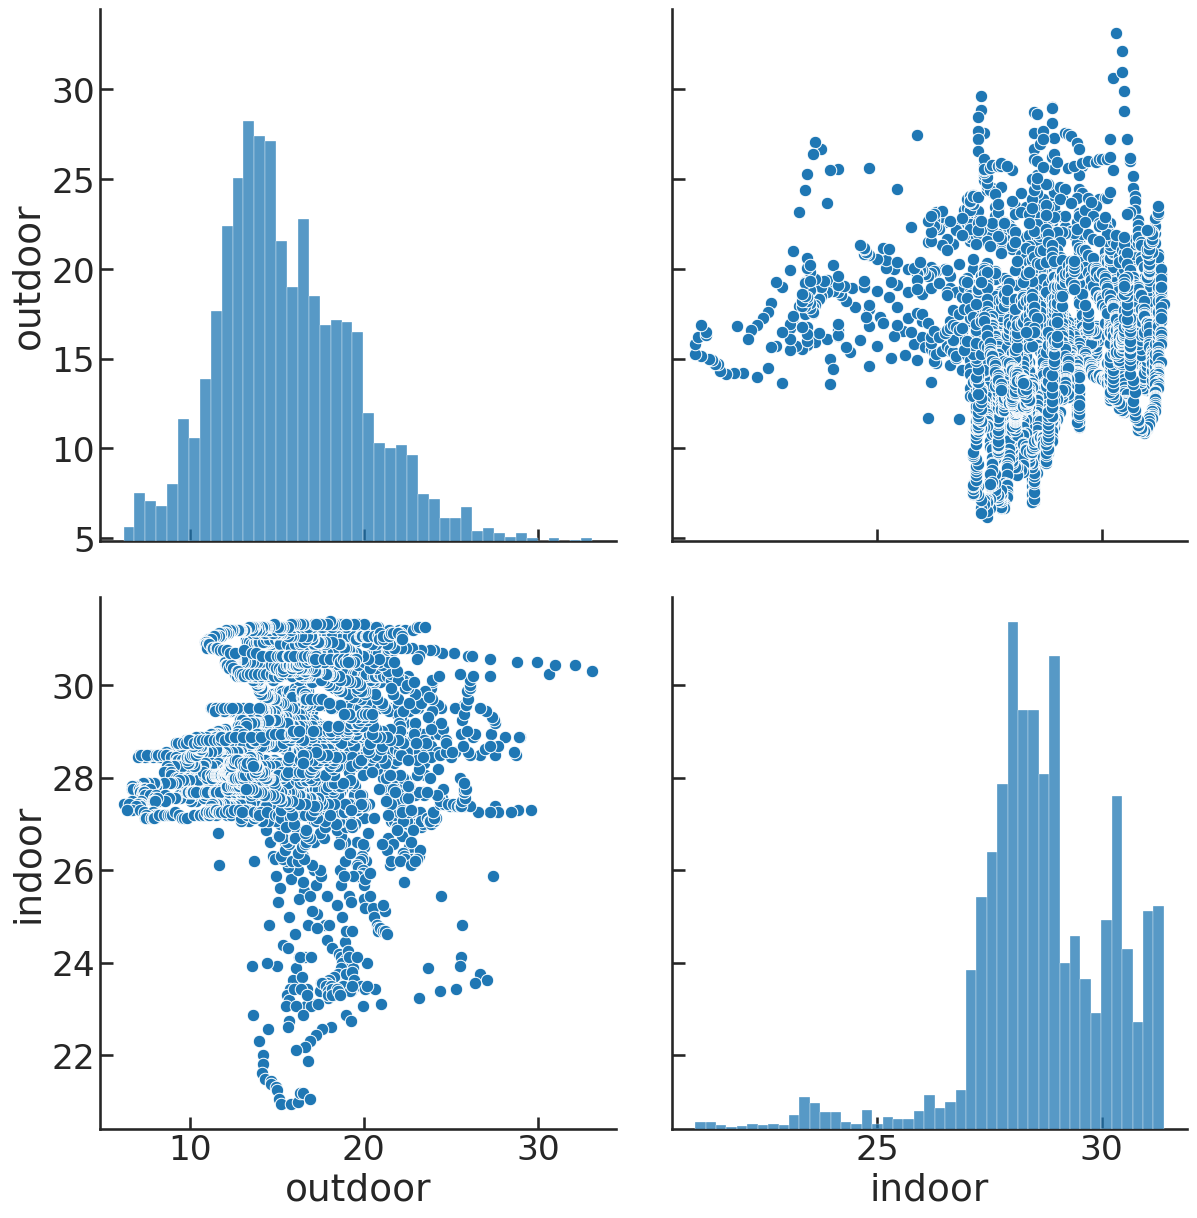

In [41]:
g=sns.pairplot(df_temp_jun.dropna())
g.fig.set_size_inches(15,15)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:122: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:122: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('b')

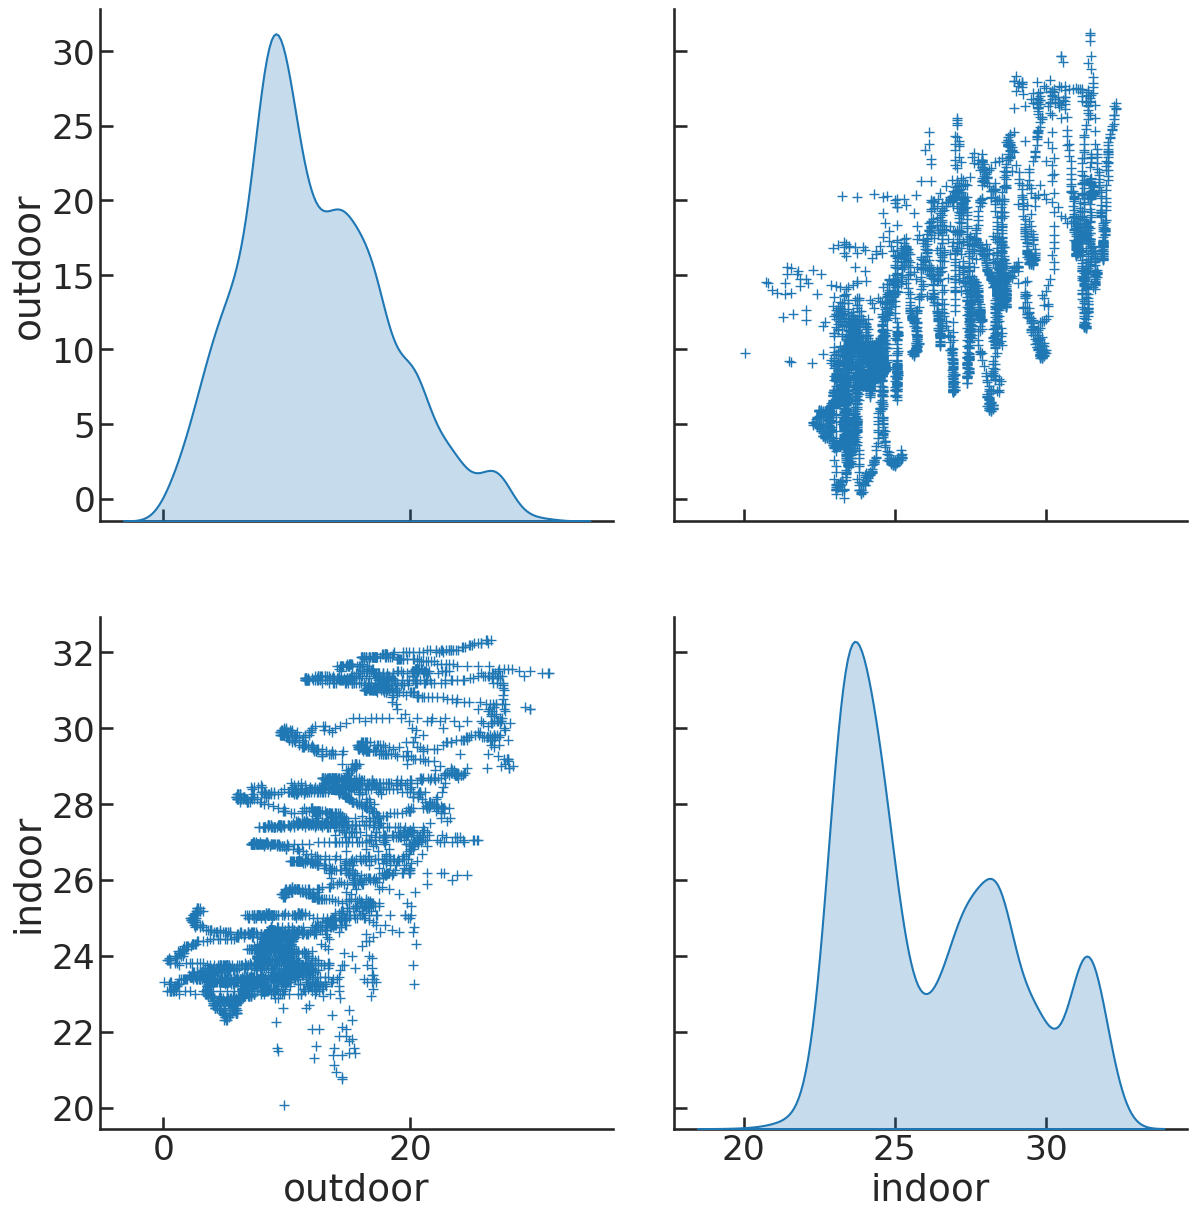

In [42]:
g = sns.pairplot(df_temp_may.dropna(), diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                  diag_kws=dict(fill=True))
g.fig.set_size_inches(15,15)

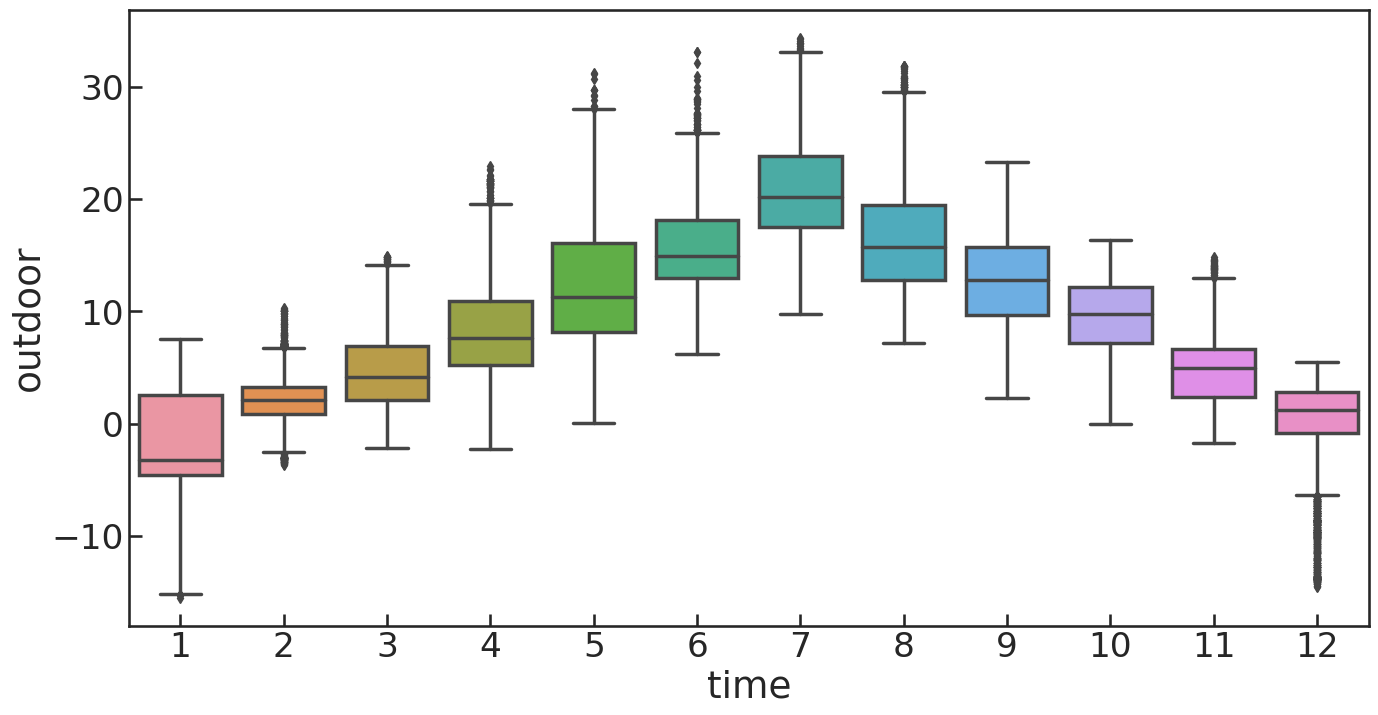

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.boxplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor);

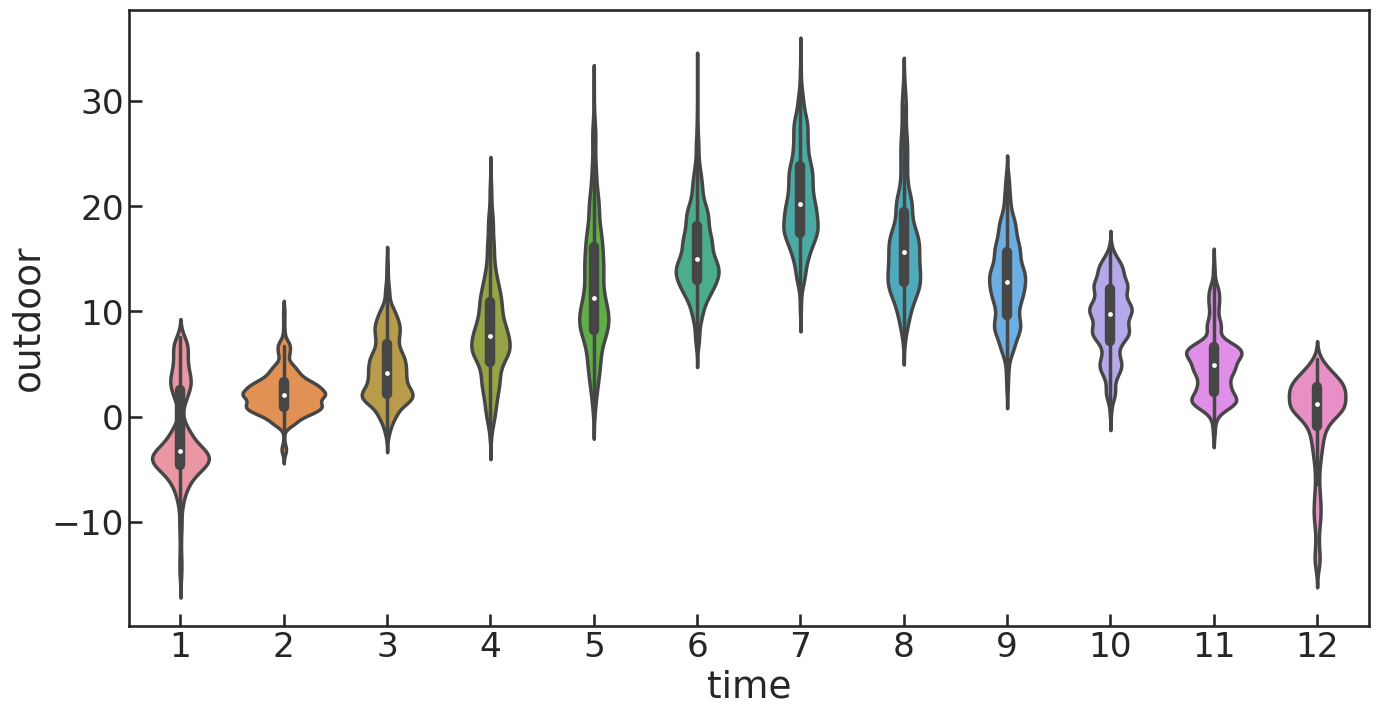

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor);

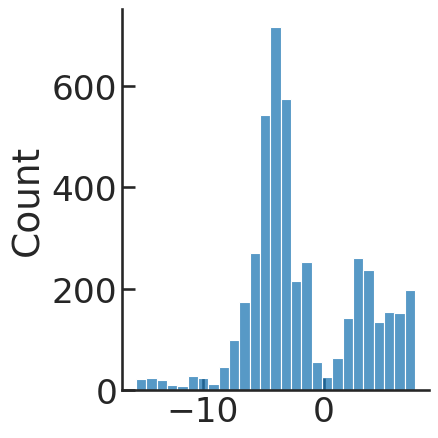

In [46]:
sns.displot(x=df_temp_jan["outdoor"].dropna().values)


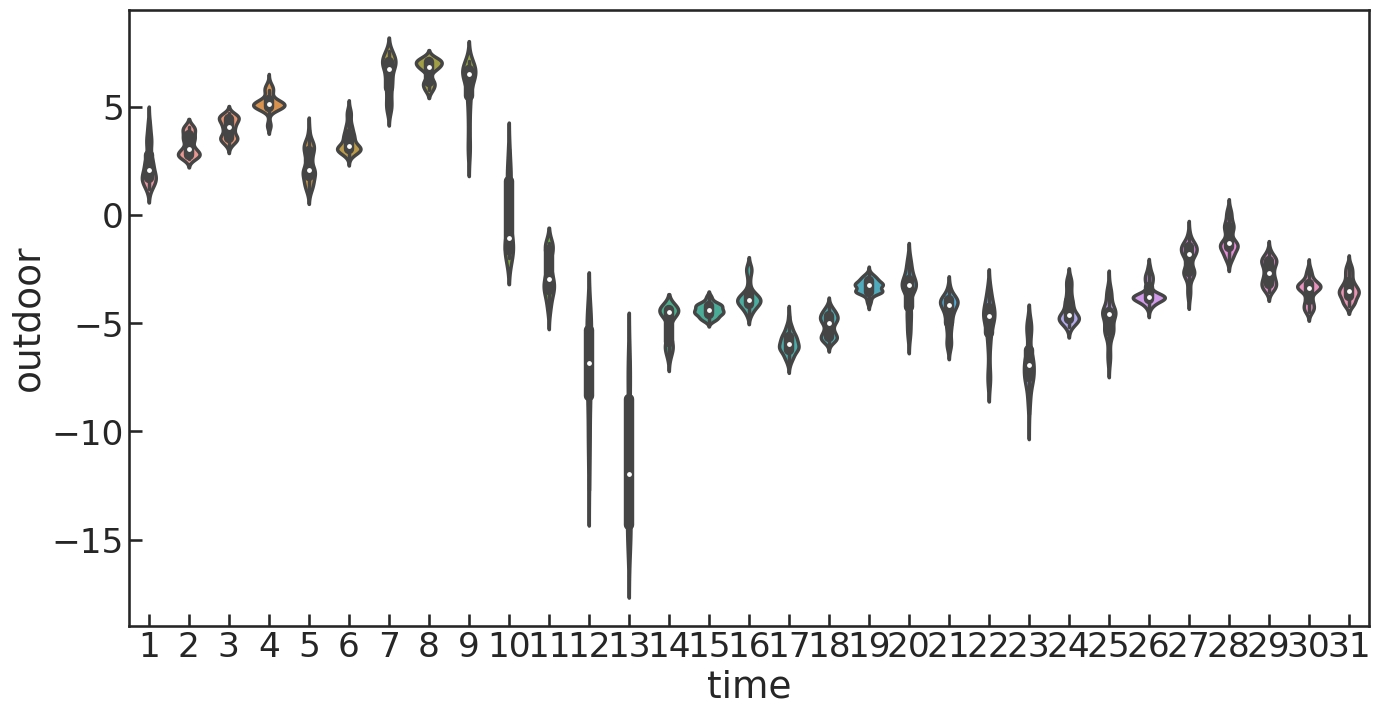

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.violinplot(x=df_temp_jan.dropna().index.day, y=df_temp_jan.dropna().outdoor);

In [48]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
df_temp["day"] = df_temp.index.day

In [49]:
df_temp.head()

,outdoor,indoor,month,hour,day
time,,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0,1
2014-01-01 00:10:00+01:00,4.25,22.00,1,0,1
2014-01-01 00:20:00+01:00,4.19,22.00,1,0,1
2014-01-01 00:30:00+01:00,4.06,22.00,1,0,1
2014-01-01 00:40:00+01:00,4.06,22.00,1,0,1


In [50]:
df_temp.tail()

,outdoor,indoor,month,hour,day
time,,,,,
2014-12-30 23:10:00+01:00,1.56,11.75,12,23,30
2014-12-30 23:20:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:30:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:40:00+01:00,1.62,11.75,12,23,30
2014-12-30 23:50:00+01:00,1.75,11.81,12,23,30
